## 1st: create a folder

In [1]:
import datetime
import os
import sys
from utilities import make_folder, int_ask

# Set the project name
user_list = os.listdir('/Users/lznus/Desktop/Data-Keithley/')
for i, user in enumerate(user_list):
    print(f'\033[33m{i+1:02}: {user}\033[33m')
print('\033[31mSelect your user ID\033[33m')
user_ID = int(input(''))
user_name = user_list[user_ID-1]

today = datetime.datetime.today().strftime('%y%m%d')

# Set the project name if you need
print('\033[31mCreate a new folder (0) or Use an existing folder (1)\033[33m')
mkdir_option = int_ask('')

if mkdir_option == 0:
    print('\033[31mEnter project name: \033[33m')
    project_name = input('')
    while project_name == '':
        print('\033[31mError: Project name cannot be empty\nEnter project name: \033[33m')
        project_name = input('')
    # Define the name
    project_dir = f"/Users/lznus/Desktop/Data-Keithley/{user_name}/{today}_ion-migration_{project_name}"
    fig_dir = f"{project_dir}/figures"
    
elif mkdir_option == 1:
    folder_list = os.listdir(f"/Users/lznus/Desktop/Data-Keithley/{user_name}")
    for i, folder in enumerate(folder_list):
        print(f'\033[33m{i+1:02}: {folder}\033[33m')
    print('\033[31mSelect your folder ID\033[33m')
    folder_ID = int(input(''))
    project_dir = f"/Users/lznus/Desktop/Data-Keithley/{user_name}/{folder_list[folder_ID-1]}"
    fig_dir = f"{project_dir}/figures"

01: Paul
02: Ren
03: Soumya
04: Yuki
Select your user ID


 4


Create a new folder (0) or Use an existing folder (1)


 0


Enter project name: 


 Ahmed-ionmigration


## 2nd: set parameters and make a file

In [2]:
# Define parameters
KEITHLEY_ADDRESS = 'USB0::0x05E6::0x2450::04491080::INSTR'
source_voltage = 5 # V
delay_time = 0.01 # sec
wait_time = 5
ON_time = 120
OFF_time = 120
duration = wait_time + ON_time + OFF_time
print(f'\033[33mEnter the file name [XXX], it will be "{project_dir}/XXX.csv"')
file_name = input('')
filename = os.path.join(project_dir, file_name + '.csv')

# Check if the project directory exists
overwrite = '' #initialize
if os.path.exists(filename):
    print(f'\033[33m\nThe file "{file_name}.csv" already exists.')
    overwrite = int_ask('Do you want to overwrite it? Yes(0) or No(1)\n')
    if overwrite == 0:
        print('\033[33mOkay, the program will overwrite the file.\n\033[33m')
    elif overwrite == 1:
        file_name2 = file_name
        while file_name2 == file_name:
            file_name2 = input(f'Enter the file name except for "{file_name}":\n')
        filename = os.path.join(project_dir, file_name2 + '.csv')

# Confirmation
if overwrite == 1:
    print(f'\033[33mThe file "{file_name2}.csv" will be saved after the following program\033[33m')
elif overwrite == 0:
    pass
else:
    print(f'\033[33mThe file "{file_name}.csv" will be saved after the following program\033[33m')

Enter the file name [XXX], it will be "/Users/lznus/Desktop/Data-Keithley/Yuki/230905_ion-migration_Ahmed-ionmigration/XXX.csv"


 Control-D


The file "Control-D.csv" will be saved after the following program


## 3rd: Run the Ketithley

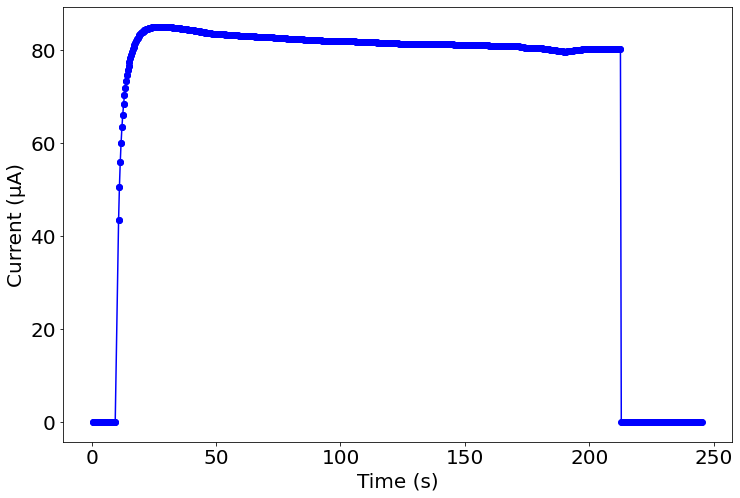

Program completed


In [3]:
import pyvisa as visa
import time
import csv
import datetime
import sys
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from utilities import current_set


# Check Parameters
print('***************   Check these parameters   *************** ')
print(f'File name: {file_name}.csv')
print(f'Voltage: {source_voltage} V')
print(f'Duration: {duration} s')

# Make sure if you start or not
START = input('\nPress Enter to Start')
if START == '':
    print("\n Let's get started :)")
    pass
else:
    sys.exit(0)

# Create the project directory if it does not exist
make_folder(project_dir)
# Create the project directory if it does not exist
make_folder(fig_dir)
    
# Open a connection to the Keithley 2450
try:
    rm = visa.ResourceManager()
    keithley = rm.open_resource(KEITHLEY_ADDRESS)
except:
    print("Error: Could not connect to instrument")
    sys.exit(0)

# Initialize the time and current arrays
times = []
currents = []
voltages = []

# Set the voltage source
keithley.write(f'SOURCE:VOLTAGE:LEVEL 0')

# Set the voltage source output on
keithley.write('OUTPUT ON')

# Start the measurement and real-time plot
start_time = time.perf_counter()
while (time.perf_counter() - start_time) < wait_time:
    round_start = time.perf_counter()
    keithley.write('MEASURE:VOLTAGE? "defbuffer1"')
    keithley.write('MEASURE:CURRENT? "defbuffer2"')
    voltage = float(keithley.query('FETCH? "defbuffer1"'))
    current = float(keithley.query('FETCH? "defbuffer2"'))
    times.append((time.perf_counter() - start_time))
    currents.append(current)
    voltages.append(voltage)
    print(f'Time: {times[-1]:.2f} s / {duration} s')
    print(f'Voltage: {voltage:.4g} V')
    print(f'Current: {current:.4g} A')
    
    if (delay_time - (time.perf_counter() - round_start)) > 0:
        time.sleep(delay_time - (time.perf_counter() - round_start))
        print(f'Real Round time: {time.perf_counter()-round_start} s')
    else:
        pass
    clear_output(wait=True)

# Set the voltage source
keithley.write(f'SOURCE:VOLTAGE:LEVEL {source_voltage}')

while (time.perf_counter() - start_time) < wait_time+ON_time:
    # round_start = time.perf_counter()
    keithley.write('MEASURE:VOLTAGE? "defbuffer1"')
    keithley.write('MEASURE:CURRENT? "defbuffer2"')
    voltage = float(keithley.query('FETCH? "defbuffer1"'))
    current = float(keithley.query('FETCH? "defbuffer2"'))
    times.append((time.perf_counter() - start_time))
    currents.append(current)
    voltages.append(voltage)
    print(f'Time: {times[-1]:.2f} s / {duration} s')
    print(f'Voltage: {voltage:.4g} V')
    print(f'Current: {current:.4g} A')
    
    if (delay_time - (time.perf_counter() - round_start)) > 0:
        time.sleep(delay_time - (time.perf_counter() - round_start))
        print(f'Real Round time: {time.perf_counter()-round_start} s')
    else:
        pass
    clear_output(wait=True)
    
# Set the voltage source
keithley.write(f'SOURCE:VOLTAGE:LEVEL 0')

while (time.perf_counter() - start_time) < wait_time+ON_time+OFF_time:
    # round_start = time.perf_counter()
    keithley.write('MEASURE:VOLTAGE? "defbuffer1"')
    keithley.write('MEASURE:CURRENT? "defbuffer2"')
    voltage = float(keithley.query('FETCH? "defbuffer1"'))
    current = float(keithley.query('FETCH? "defbuffer2"'))
    times.append((time.perf_counter() - start_time))
    currents.append(current)
    voltages.append(voltage)
    print(f'Time: {times[-1]:.2f} s / {duration} s')
    print(f'Voltage: {voltage:.4g} V')
    print(f'Current: {current:.4g} A')
    
    if (delay_time - (time.perf_counter() - round_start)) > 0:
        time.sleep(delay_time - (time.perf_counter() - round_start))
        print(f'Real Round time: {time.perf_counter()-round_start} s')
    else:
        pass
    clear_output(wait=True)

# Set the voltage source output off
keithley.write('OUTPUT OFF')

# Create a CSV file for saving the data
with open(filename, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Time (s)', 'Current (A)', 'Voltage (V)'])
    for i in range(len(times)):
        csvwriter.writerow([times[i], currents[i], voltages[i]])

# Check that the CSV file was created successfully
try:
    with open(filename, 'r') as csvfile:
        pass
except:
    print("Error: Could not create CSV file")

# Close the connection to the Keithley 2450
keithley.close()

clear_output(wait=True)
# Save the figure
if overwrite == 1:
    fig_path = os.path.join(fig_dir, file_name2 + '.png')
else:
    fig_path = os.path.join(fig_dir, file_name + '.png')

fig2 = plt.figure(figsize=(12,8))
plt.rcParams["font.size"] = 20
ylabel, currents_plot = current_set(currents)
plt.plot(times, currents_plot, linestyle='-', marker='o', color='blue')
plt.xlabel('Time (s)')
plt.ylabel(ylabel)    
plt.show()
fig2.savefig(fig_path, transparent = True)

print("Program completed")

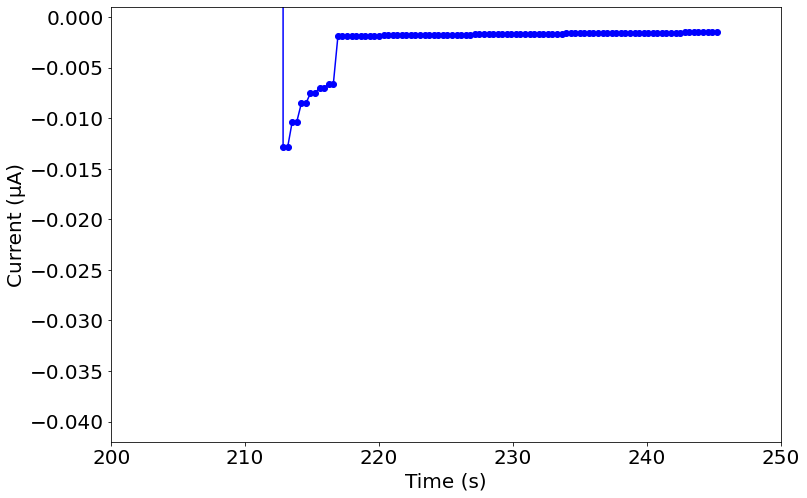

In [12]:
fig3 = plt.figure(figsize=(12,8))
plt.rcParams["font.size"] = 20
ylabel, currents_plot = current_set(currents)
plt.plot(times, currents_plot, linestyle='-', marker='o', color='blue')
plt.xlabel('Time (s)')
plt.ylabel(ylabel) 
plt.xlim(200,250)
plt.ylim(-0.042,0.001)
plt.show()

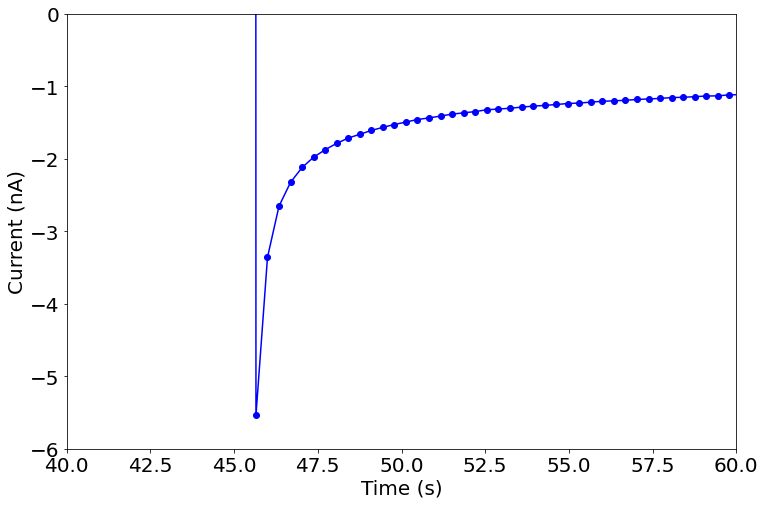

In [23]:
fig3 = plt.figure(figsize=(12,8))
plt.rcParams["font.size"] = 20
ylabel, currents_plot = current_set(currents)
plt.plot(times, currents_plot, linestyle='-', marker='o', color='blue')
plt.xlabel('Time (s)')
plt.ylabel(ylabel) 
plt.xlim(40,60)
plt.ylim(-6,0.001)
plt.show()

In [ ]:
## To check the Keithley address, use this code

from pymeasure.instruments import list_resources
list_resources()

## Make a combined figure

In [62]:
import glob
import os
data_list = glob.glob(f'{project_dir}/*.csv')
csv_list = []
csv_list.sort()

for i, file in enumerate(data_list):
    csv_list.append(os.path.splitext(os.path.basename(file))[0])
    print(f'{i:02}: {os.path.splitext(os.path.basename(file))[0]}')

00: 230528-0.2mmh_-12.0V
01: 230528-0.2mmh_-120.0V
02: 230528-0.2mmh_-2.4V
03: 230528-0.2mmh_-24.0V
04: 230528-0.2mmh_-4.8V
05: 230528-0.2mmh_-48.0V
06: 230528-0.2mmh_test_33.6uGys_-2.4V
07: 230528-0.2mmh_test_33.6uGys_-2.4V_large-collimator
08: 230530-0.5mmh-test_-15.5V_30cm-0.45-3.15mA_4.8-33.6uGys
09: 230530-0.5mmh-test_-155V_25mA-30cm-266.9uGys_1atm
10: 230530-0.5mmh-test_-155V_3.15mA-30cm-33.6uGys_1atm
11: 230530-0.5mmh-test_-155V_33.6uGys_1atm
12: 230530-0.5mmh_-15.5V
13: 230530-0.5mmh_-155.0V
14: 230530-0.5mmh_-3.1V
15: 230530-0.5mmh_-31.0V
16: 230530-0.5mmh_-6.2V
17: 230530-0.5mmh_-62.0V


filename distance-effect


0: 230530-0.5mmh-test_-15.5V_30cm-0.45-3.15mA_4.8-33.6uGys
1: 230530-0.5mmh_-15.5V


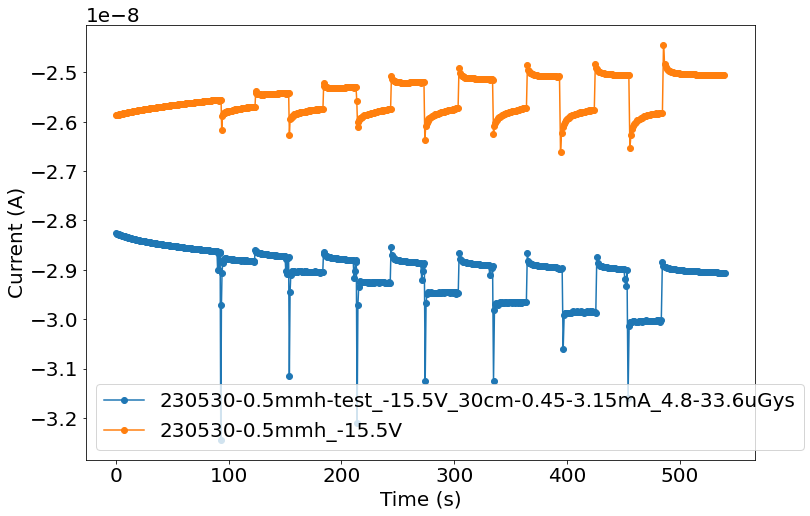

Folder "/Users/lznus/Desktop/Data-Keithley/Yuki/230602_tI_Au-MPB-Ga_polished_02-05/figures/combined" already exists.


In [64]:
plot_index = [8,12] # Chose the numbers
fig_name = input('filename')

plot_list = []
for i in range(len(plot_index)):
    plot_list.append(csv_list[plot_index[i]])

for i, file in enumerate(plot_list):
    print(f'{i}: {file}')
    
import pandas as pd

figure = plt.figure(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')

for file in plot_list:
    df = pd.read_csv(f'{project_dir}/{file}.csv')
    plt.plot(df['Time (s)'], df['Current (A)'], linestyle='-', marker='o', label = file)

plt.legend()
plt.show()

# Create the project directory if it does not exist
fig_com_dir = f"{fig_dir}/combined"
make_folder(fig_com_dir)
fig_com_path = os.path.join(fig_com_dir, fig_name + '.png')
figure.savefig(fig_com_path, transparent = True)

In [ ]:
plot_index = [3,5,7,11,16,14] # Chose the numbers
fig_name = 'low-dose-pressureeffects-small-col-modified'

plot_list = []
for i in range(len(plot_index)):
    plot_list.append(csv_list[plot_index[i]])

for i, file in enumerate(plot_list):
    print(f'{i}: {file}')
    
import pandas as pd

figure = plt.figure(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')

for file in plot_list:
    df = pd.read_csv(f'{project_dir}/{file}.csv')
    x=df['Time (s)'].to_list()
    y=df['Current (A)'].to_list()
    x = [n-60 for n in x]
    y = [n/0.36*1e12 for n in y] #pA/cm2
    plt.plot(x, y, linestyle='-', marker='o', label = file)

plt.ylabel('J (pA/cm2)')
plt.xlim(0,60)
plt.ylim(-100,600)
plt.legend()
plt.show()

# Create the project directory if it does not exist
fig_com_dir = f"{fig_dir}/combined"
make_folder(fig_com_dir)
fig_com_path = os.path.join(fig_com_dir, fig_name + '.png')
figure.savefig(fig_com_path, transparent = True)